<a href="https://colab.research.google.com/github/Yugsolanki/ML-SC-Lab/blob/main/Self_Organizing_Maps_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# 1. Data Generation and Preprocessing

In [2]:
# Generate synthetic data
n_samples = 1000
n_features = 2
X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Self-Organizing Map Implementation

In [3]:
class SOM:
    def __init__(self, m, n, dim, n_iterations=100, learning_rate=0.1):
        self.m = m  # number of rows
        self.n = n  # number of columns
        self.dim = dim  # dimensionality of input data
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate
        self.weights = np.random.randn(m, n, dim)

    def find_bmu(self, x):
        distances = np.sum((self.weights - x) ** 2, axis=2)
        return np.unravel_index(np.argmin(distances), distances.shape)

    def update_weights(self, x, bmu, iteration):
        learning_rate = self.learning_rate * np.exp(-iteration / self.n_iterations)
        lr_func = lambda c: learning_rate * np.exp(-c / (self.n_iterations / 2))

        for i in range(self.m):
            for j in range(self.n):
                w = self.weights[i, j, :]
                dist = np.sqrt(((i - bmu[0]) ** 2) + ((j - bmu[1]) ** 2))
                self.weights[i, j, :] += lr_func(dist) * (x - w)

    def train(self, data):
        for iteration in range(self.n_iterations):
            for x in data:
                bmu = self.find_bmu(x)
                self.update_weights(x, bmu, iteration)

# 3. Training the SOM

In [5]:
som = SOM(10, 10, n_features, n_iterations=1000)
som.train(X_scaled)

# 4. Visualization

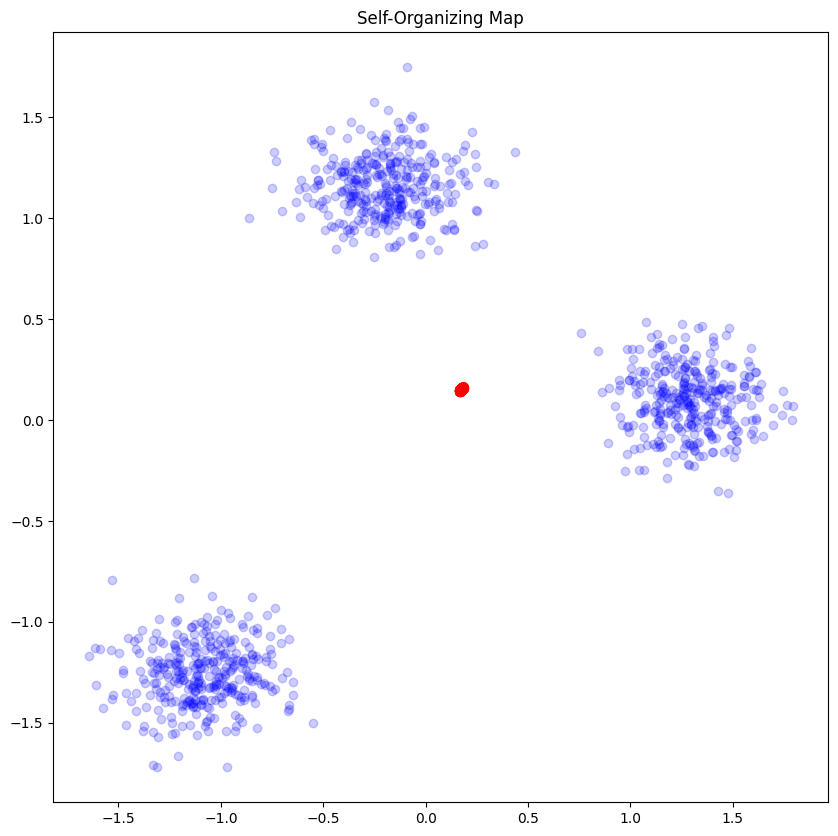

In [6]:
plt.figure(figsize=(10, 10))
for i in range(som.m):
    for j in range(som.n):
        plt.scatter(som.weights[i, j, 0], som.weights[i, j, 1], c='r', s=50)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='b', alpha=0.2)
plt.title("Self-Organizing Map")
plt.show()

# 5. Data Analysis

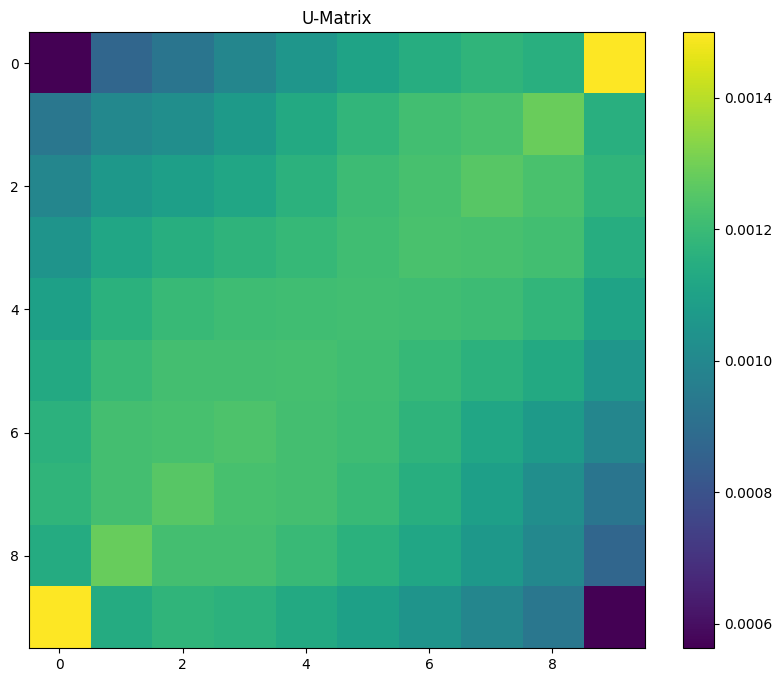

In [7]:
# Compute the U-Matrix
u_matrix = np.zeros((som.m, som.n))
for i in range(som.m):
    for j in range(som.n):
        neighbors = []
        for di in [-1, 0, 1]:
            for dj in [-1, 0, 1]:
                if 0 <= i + di < som.m and 0 <= j + dj < som.n:
                    neighbors.append(som.weights[i + di, j + dj, :])
        u_matrix[i, j] = np.mean([np.linalg.norm(som.weights[i, j, :] - neighbor) for neighbor in neighbors])

plt.figure(figsize=(10, 8))
plt.imshow(u_matrix, cmap='viridis')
plt.colorbar()
plt.title("U-Matrix")
plt.show()

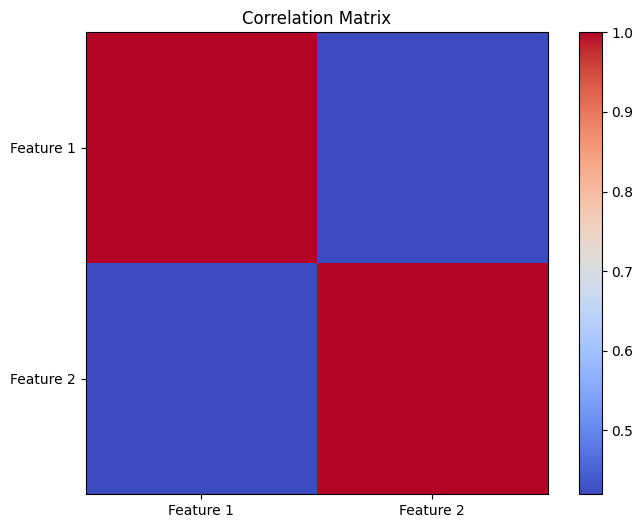

In [8]:
# Correlation analysis
corr_matrix = np.corrcoef(X_scaled.T)
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.title("Correlation Matrix")
plt.xticks(range(n_features), [f'Feature {i+1}' for i in range(n_features)])
plt.yticks(range(n_features), [f'Feature {i+1}' for i in range(n_features)])
plt.show()

In [9]:
# Print correlation coefficients
print("Correlation Coefficients:")
for i in range(n_features):
    for j in range(i+1, n_features):
        print(f"Feature {i+1} - Feature {j+1}: {corr_matrix[i, j]:.4f}")

Correlation Coefficients:
Feature 1 - Feature 2: 0.4197
